In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
plt.style.use(os.path.join(os.getcwd(), 'default.mplstyle'))

from astropy import constants as const
from astropy import units as u

### utils development

In [2]:
from LWphotorates.utils import nu2lambda, lambda2nu

In [3]:
wavelength_array = np.array([911., 1221.])

In [4]:
frequency_array = lambda2nu(wavelength_array)

In [16]:
nu2lambda(frequency_array.value)

<Quantity [ 911., 1221.] Angstrom>

In [8]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [3]:
from LWphotorates.utils import spec_nu2lambda, spec_lambda2nu

In [25]:
example_spec_wl = spectra_SEDs[0]

example_spec_freq = spec_lambda2nu(wl_SEDs, example_spec_wl)

recalc_example_spec_wl = spec_nu2lambda(freq_SEDs, example_spec_freq)

In [26]:
example_spec_wl

<Quantity [4.91590073e+29, 1.58562218e+30, 3.27275816e+30, ...,
           2.67255190e+28, 2.34019809e+28, 2.16018969e+28] erg / (Angstrom s)>

In [28]:
(recalc_example_spec_wl - example_spec_wl) / example_spec_wl

<Quantity [-1.43145169e-16,  1.77517053e-16, -1.72010863e-16, ...,
            1.64563559e-16,  1.87934796e-16,  0.00000000e+00]>

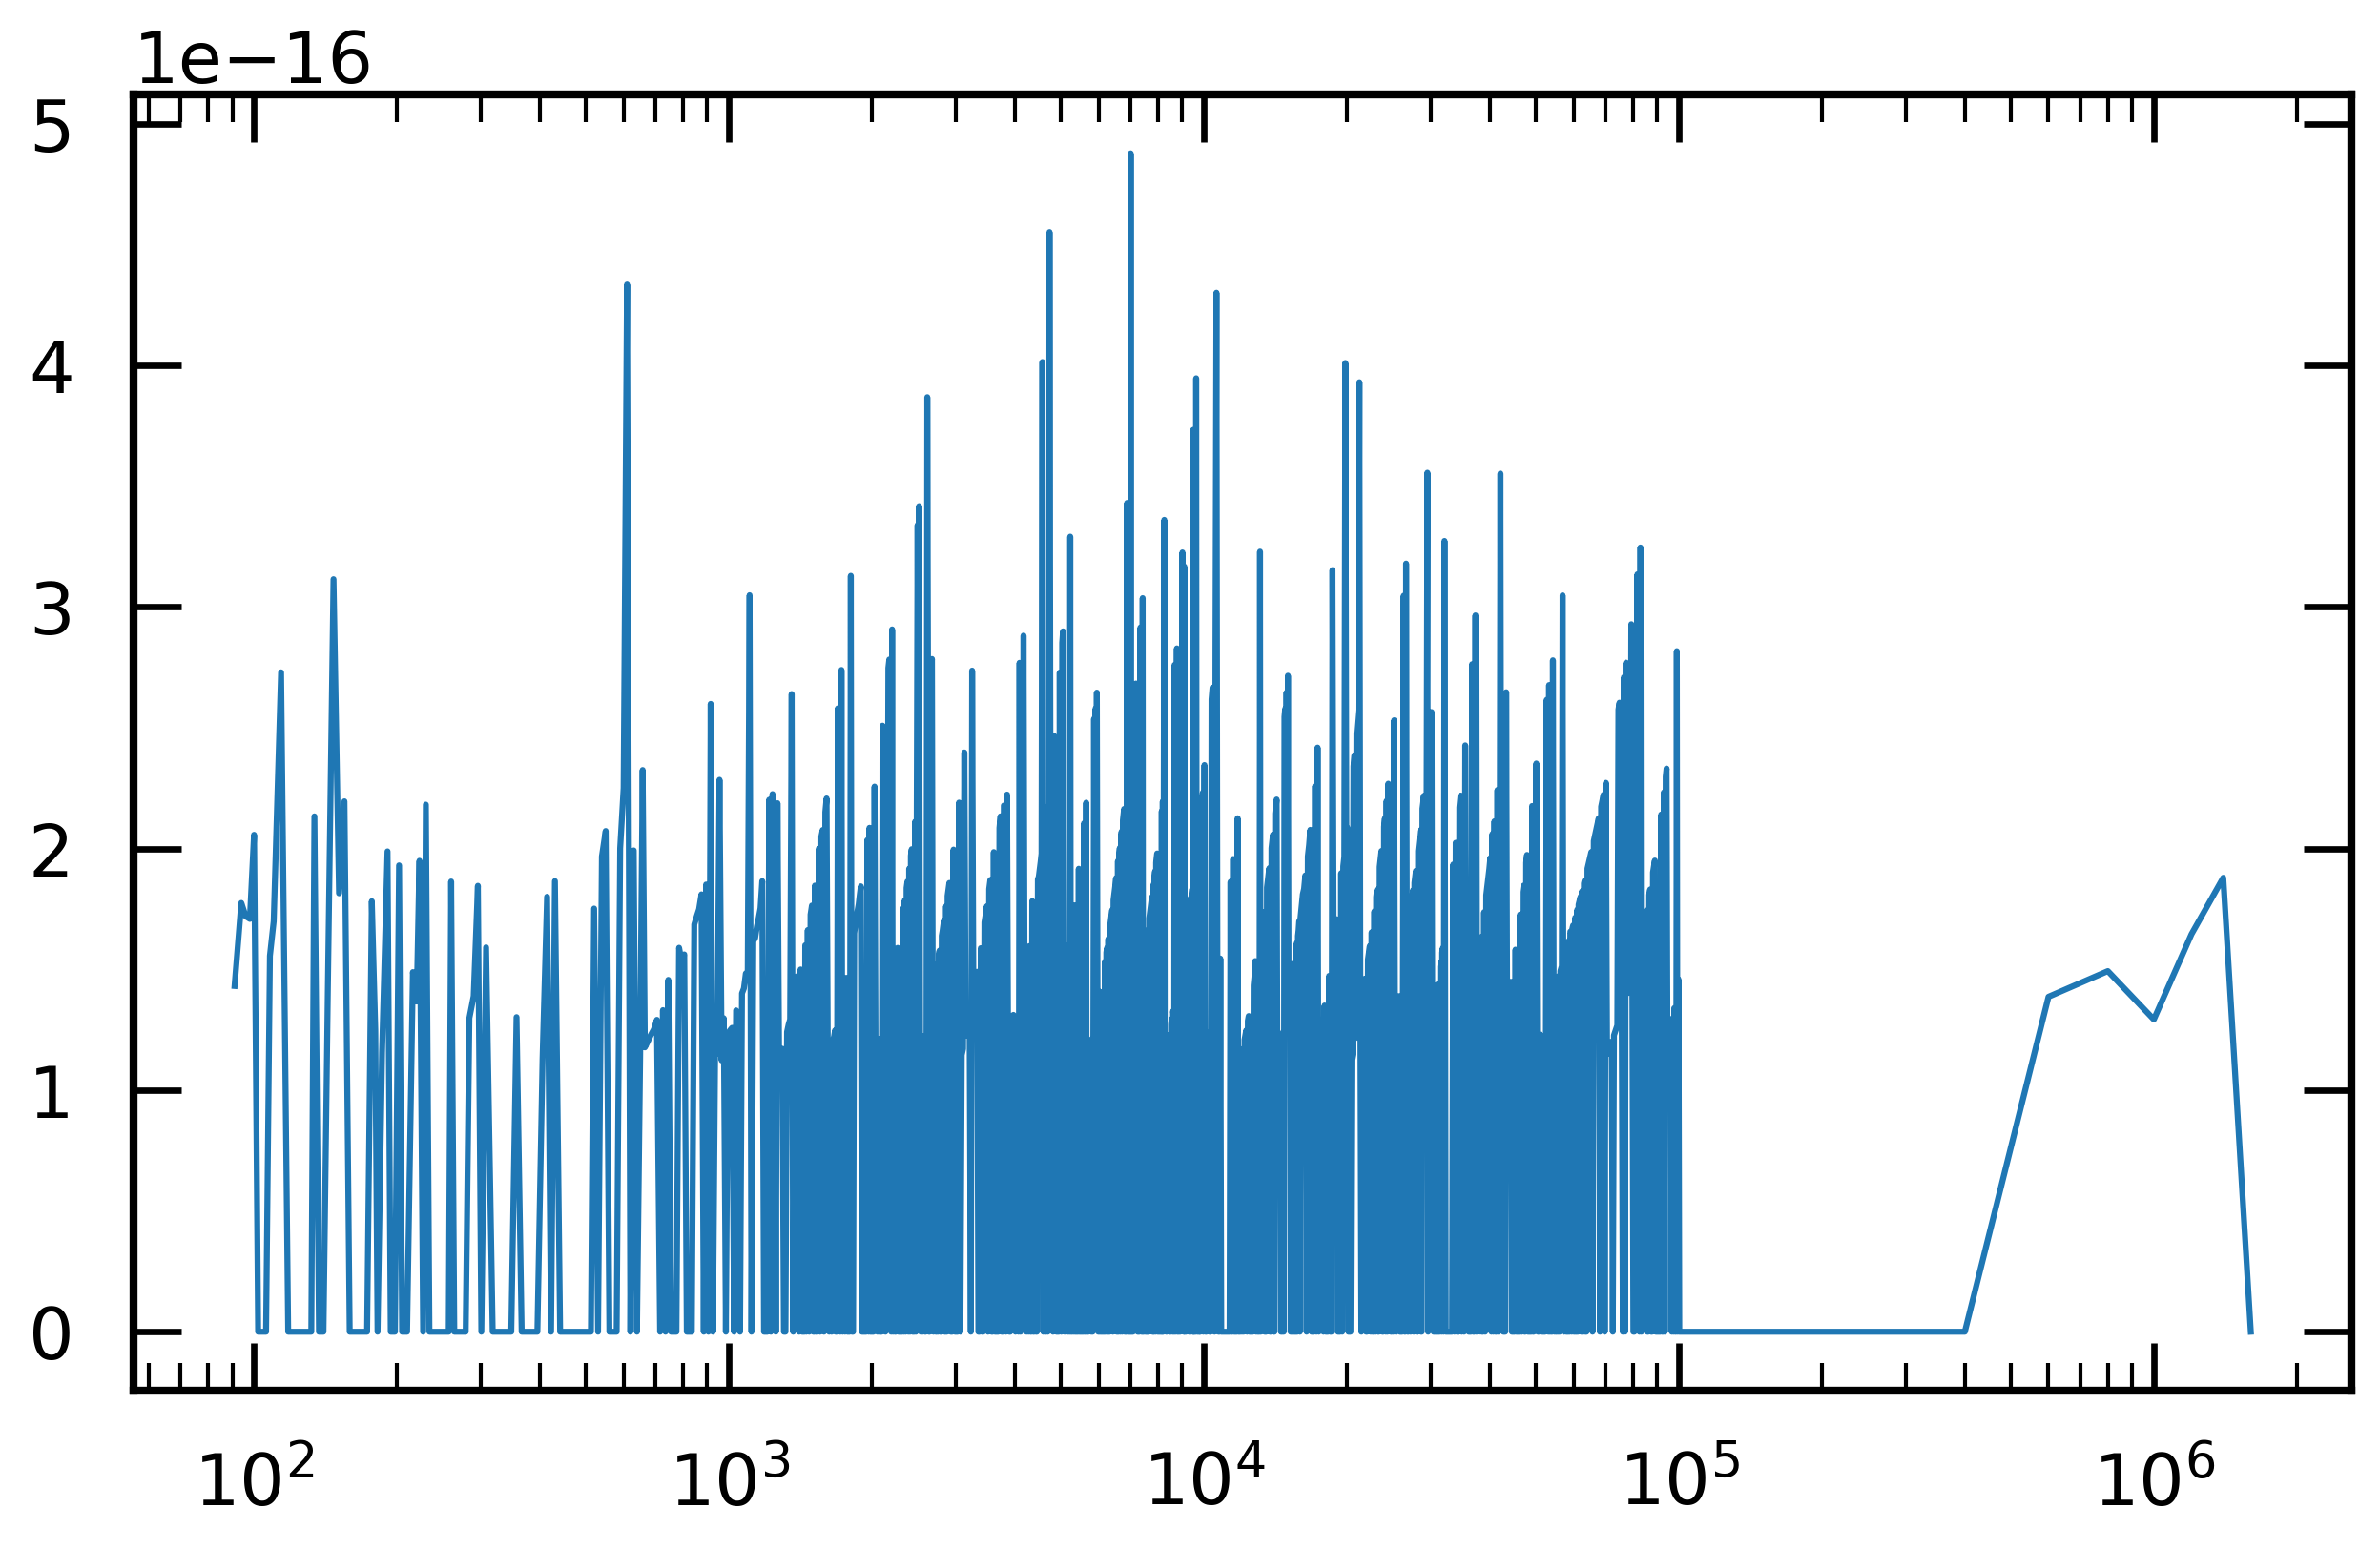

In [31]:
fig, ax = plt.subplots()
ax.plot(wl_SEDs, abs(recalc_example_spec_wl - example_spec_wl) / example_spec_wl)
ax.set_xscale('log')
# ax.set_yscale('log')

In [2]:
from LWphotorates.utils import generate_flat_spectrum

In [4]:
generate_flat_spectrum(spectrum_length=100, normalisation_intensity=2)

<Quantity [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2.] erg / (cm2 Hz s sr)>

In [19]:
Trad = 1e5 * u.K

frequency_array = lambda2nu(wavelength_array)
energy_array = frequency_array * const.h.to(u.eV / u.Hz)

bb=((2./u.sr*const.h.to(u.erg/u.Hz)*(frequency_array**3)/(const.c.to(u.cm*u.Hz)**2))/(np.exp(energy_array/(const.k_B.to(u.eV/u.K)*Trad))-1.))

In [20]:
bb

<Quantity [0.09704265, 0.13642512] erg / (cm2 sr)>

In [22]:
speed_of_light = (const.c).to(u.cm * u.Hz)
constant_factor = 2. / u.sr * (const.h).to(u.erg * u.s) / speed_of_light**2

constant_factor * frequency_array**3 / (np.exp(energy_array / ((const.k_B).to(u.eV / u.K) * Trad)) - 1.)

In [26]:
constant_factor * frequency_array**3 / (np.exp(energy_array / ((const.k_B).to(u.eV / u.K) * Trad)) - 1.)

<Quantity [0.09704265, 0.13642512] erg Hz s / (cm2 sr)>

In [5]:
from LWphotorates.utils import generate_blackbody_spectrum, spectrum_BB_norm

In [7]:
Trad = 1e5 * u.K

frequency_array = lambda2nu(wavelength_array)
energy_array = frequency_array * const.h.to(u.eV / u.Hz)

In [8]:
spectrum_BB_norm(Trad=Trad, energies=energy_array)

<Quantity [0.71192804, 1.00084724] erg / (cm2 Hz s sr)>

In [9]:
generate_blackbody_spectrum(radiation_temperature=Trad, energy_array=energy_array)

<Quantity [0.71192804, 1.00084724] erg / (cm2 Hz s sr)>

In [10]:
generate_blackbody_spectrum(radiation_temperature=Trad, energy_array=energy_array, normalise_spectrum=True, photon_energy_normalisation=10)

<Quantity [1.02016777, 1.43417878] erg / (cm2 Hz s sr)>

In [12]:
generate_blackbody_spectrum(radiation_temperature=Trad, energy_array=energy_array, normalise_spectrum=False)

<Quantity [0.09704265, 0.13642512] erg / (cm2 Hz s sr)>

In [4]:
from LWphotorates.utils import convert_energy_cm2k, convert_energy_k2cm, convert_energy_cm2ev, convert_energy_ev2cm

In [9]:
convert_energy_cm2ev(1e4)

<Quantity 1.23984198 eV>

In [10]:
convert_energy_ev2cm(1.23984198)

<Quantity 9999.99996506 1 / cm>

In [11]:
energy = 1.23984198 * u.eV

In [15]:
equiv_T = energy / const.k_B.to(u.eV / u.K)

In [16]:
convert_energy_k2cm(equiv_T)

<Quantity 9999.99996506 1 / cm>

### interpolation of spectra

In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline
from LWphotorates.utils import interpolate_array, lambda2nu
from LWphotorates.HM import get_cross_section

In [3]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [4]:
cross_section = get_cross_section()

In [5]:
old_x_axis = freq_SEDs
old_y_axis = spectra_SEDs
new_x_axis = cross_section['frequency']

if old_y_axis.ndim == 1:
    old_y_axis = np.atleast_2d(old_y_axis)
number_of_spectra = old_y_axis.shape[0]

In [6]:
units = old_y_axis.unit
new_y_axis = np.empty(shape=(number_of_spectra, len(new_x_axis)))
for i in range(number_of_spectra):
    interp = InterpolatedUnivariateSpline(old_x_axis, old_y_axis[i].value, k=1)
    new_y_axis[i]=interp(new_x_axis)
new_y_axis = new_y_axis * units

In [7]:
new_y_axis

<Quantity [[4.39743165e+37, 4.39550827e+37, 4.39358489e+37, ...,
            3.48309612e+33, 3.48293841e+33, 3.48276857e+33],
           [4.44920579e+37, 4.44725868e+37, 4.44531157e+37, ...,
            3.52714990e+33, 3.52699076e+33, 3.52681938e+33],
           [4.50774986e+37, 4.50577453e+37, 4.50379920e+37, ...,
            3.57895125e+33, 3.57879045e+33, 3.57861729e+33],
           ...,
           [2.08618015e+36, 2.08586588e+36, 2.08555161e+36, ...,
            1.16047898e+33, 1.16035992e+33, 1.16023171e+33],
           [1.91809868e+36, 1.91785105e+36, 1.91760342e+36, ...,
            1.12838382e+33, 1.12826776e+33, 1.12814277e+33],
           [1.83261919e+36, 1.83247630e+36, 1.83233340e+36, ...,
            1.23423297e+33, 1.23410291e+33, 1.23396284e+33]] erg / (Angstrom s)>

In [8]:
new_y_axis = interpolate_array(
    old_x_axis=old_x_axis,
    old_y_axis=old_y_axis,
    new_x_axis=new_x_axis
)

In [9]:
new_y_axis

<Quantity [[4.39743165e+37, 4.39550827e+37, 4.39358489e+37, ...,
            3.48309612e+33, 3.48293841e+33, 3.48276857e+33],
           [4.44920579e+37, 4.44725868e+37, 4.44531157e+37, ...,
            3.52714990e+33, 3.52699076e+33, 3.52681938e+33],
           [4.50774986e+37, 4.50577453e+37, 4.50379920e+37, ...,
            3.57895125e+33, 3.57879045e+33, 3.57861729e+33],
           ...,
           [2.08618015e+36, 2.08586588e+36, 2.08555161e+36, ...,
            1.16047898e+33, 1.16035992e+33, 1.16023171e+33],
           [1.91809868e+36, 1.91785105e+36, 1.91760342e+36, ...,
            1.12838382e+33, 1.12826776e+33, 1.12814277e+33],
           [1.83261919e+36, 1.83247630e+36, 1.83233340e+36, ...,
            1.23423297e+33, 1.23410291e+33, 1.23396284e+33]] erg / (Angstrom s)>

### new HM detachment rate calc

In [4]:
from LWphotorates.HM import calc_kHM
from LWphotorates import compute_kHM

In [5]:
new_rates = calc_kHM(wavelength_array=wl_SEDs, spectra_wl=spectra_SEDs, distance=1.*u.kpc)
new_rates_wrapper = compute_kHM(wavelength_array=wl_SEDs, spectra_wl=spectra_SEDs)

In [6]:
import h5py

test_rates_file_path = os.path.join(os.getcwd(), 'inputdata', 'test_rates', 'test_rates_initial_status.h5')
test_rates_file = h5py.File(test_rates_file_path, 'r')
old_rates = test_rates_file['slug/HM'][:]

In [7]:
relative_difference = abs(old_rates - new_rates.value) / old_rates
relative_difference_wrapper = abs(old_rates - new_rates_wrapper.value) / old_rates

In [8]:
test_rates_file.close()

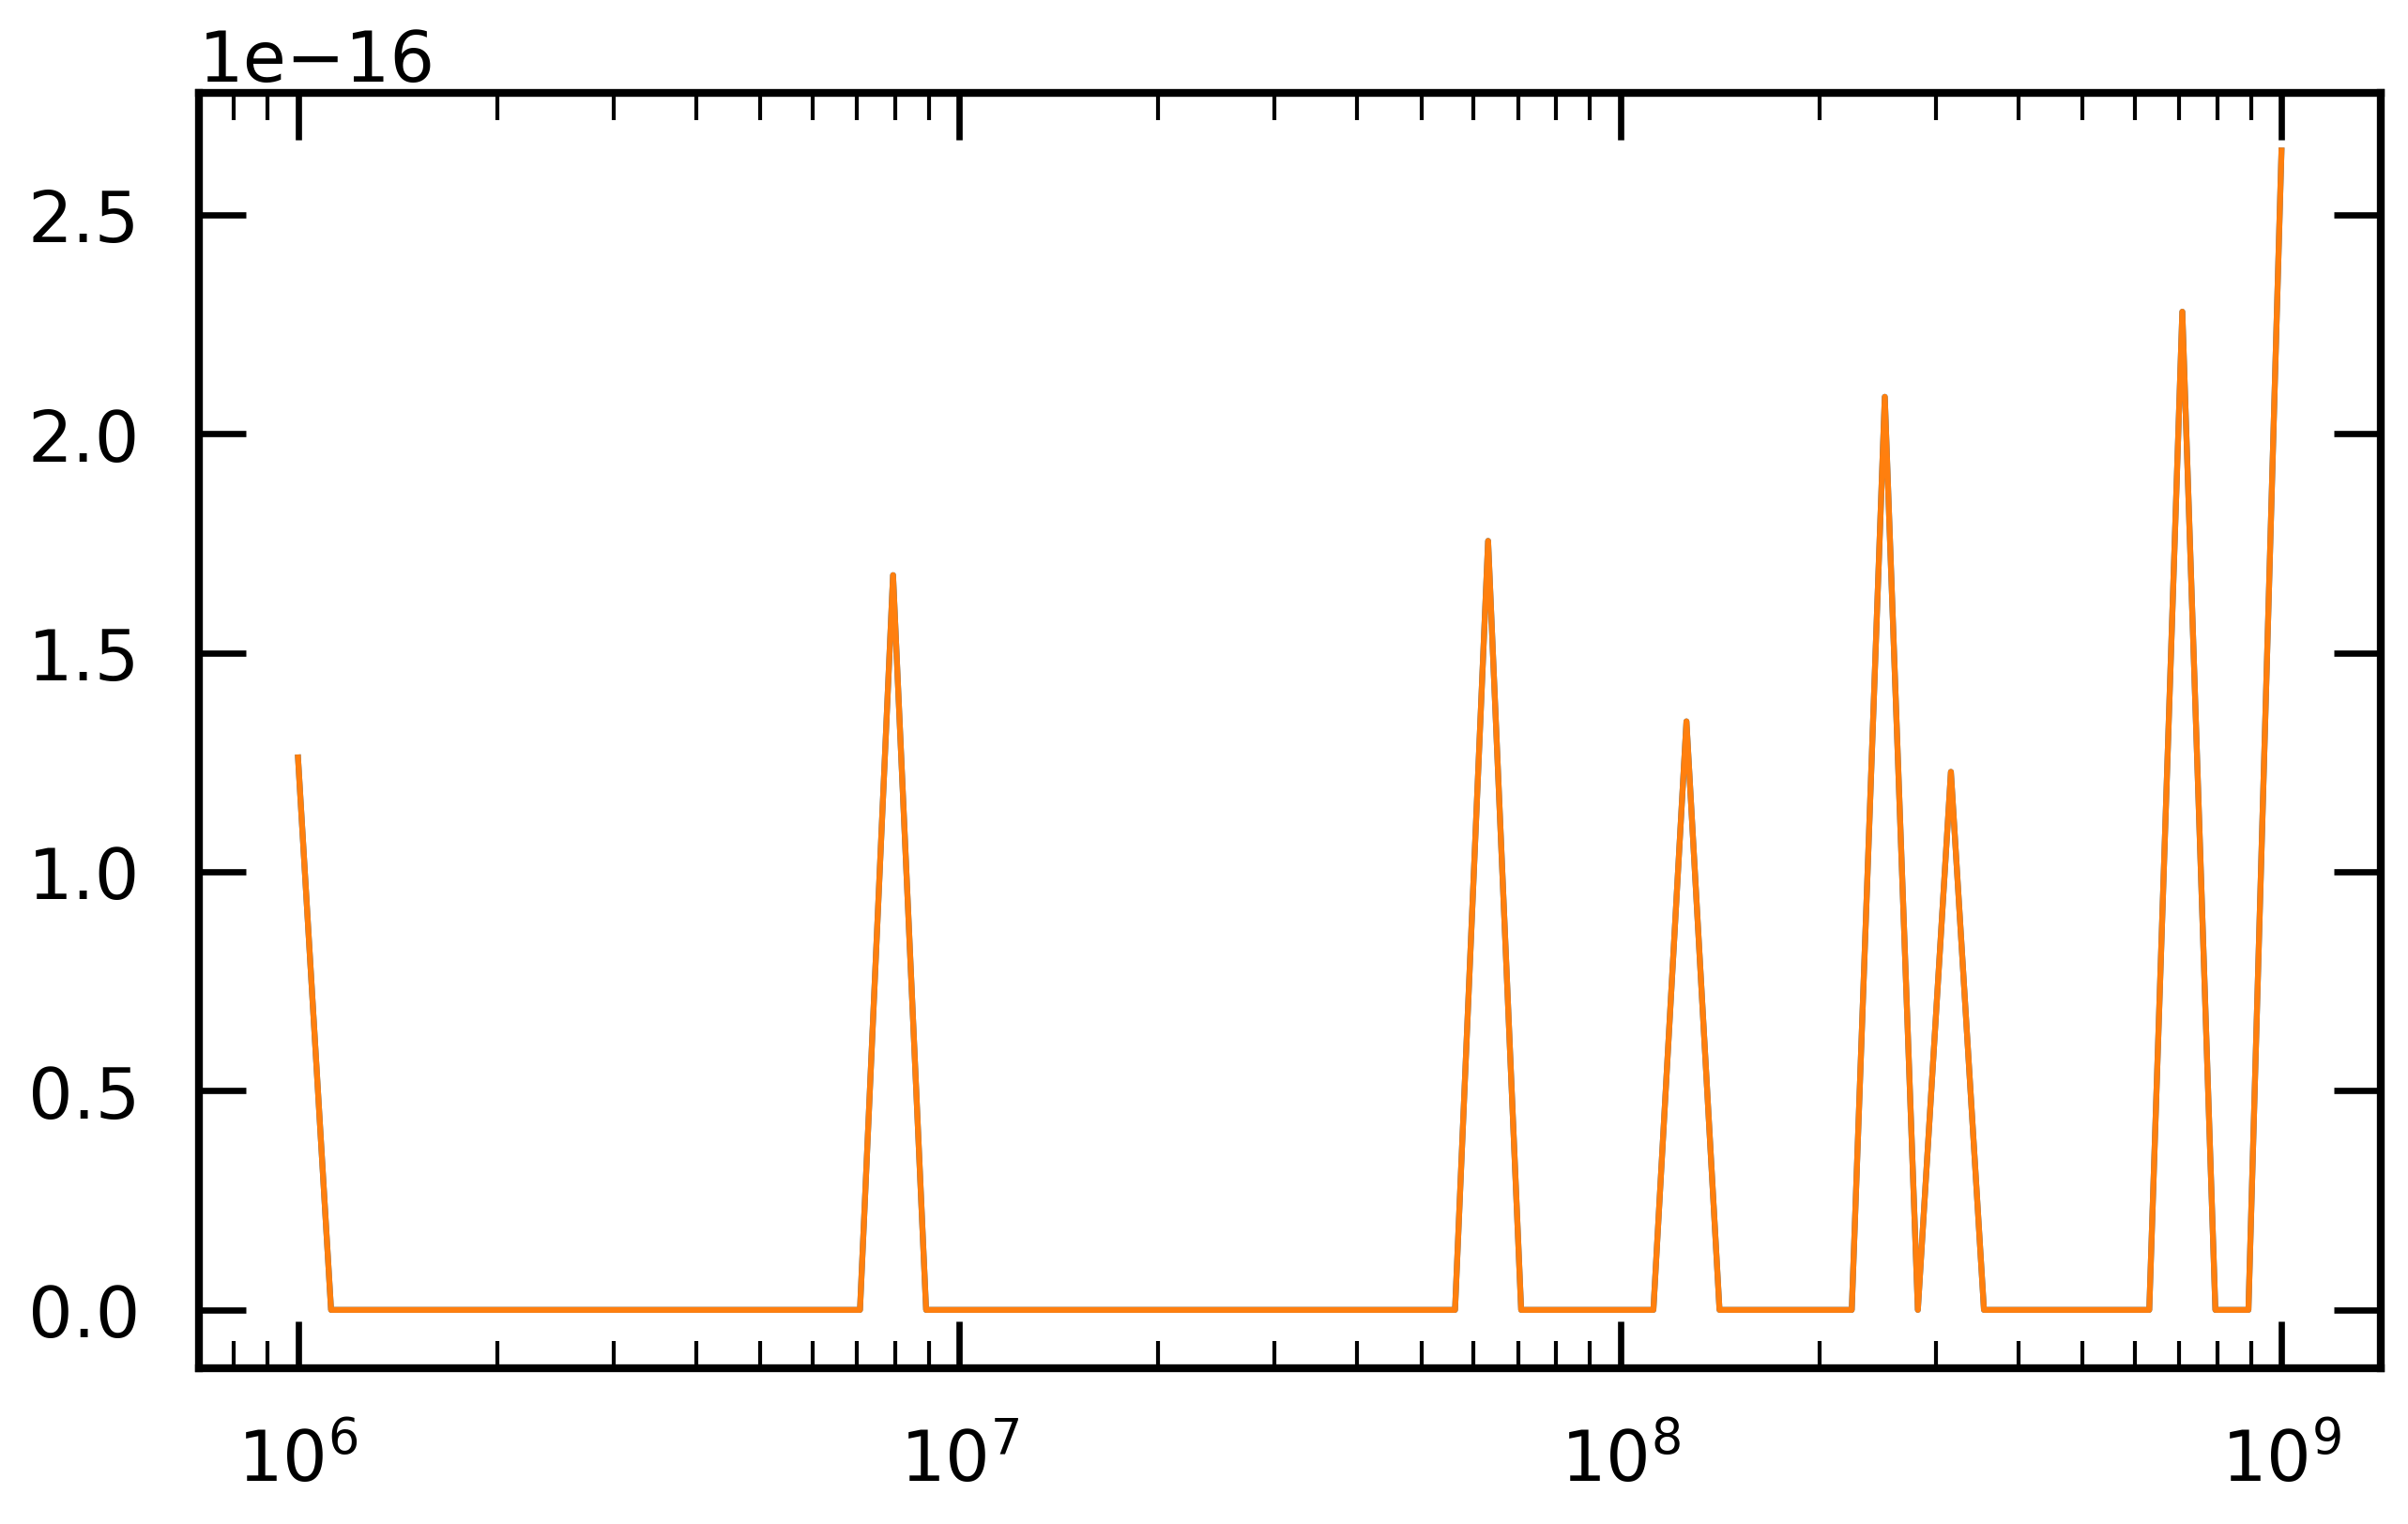

In [9]:
fig, ax = plt.subplots()
ax.plot(age_stars_SEDs, relative_difference)
ax.plot(age_stars_SEDs, relative_difference_wrapper)
ax.set_xscale('log')
# ax.set_yscale('log')

# H2p datasets

In [117]:
from LWphotorates.H2p import read_Babb, read_Zammit
from LWphotorates.utils import lambda2nu

In [118]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [119]:
energy_levels_babb, cross_section_babb = read_Babb(wl_SEDs)

In [120]:
energy_levels_zammit, cross_section_zammit = read_Zammit(wl_SEDs)

In [121]:
print(energy_levels_babb['eV'].shape)
print(energy_levels_zammit['eV'].shape)

(337,)
(423,)


## quick plots for comparison

(0.1, 30)

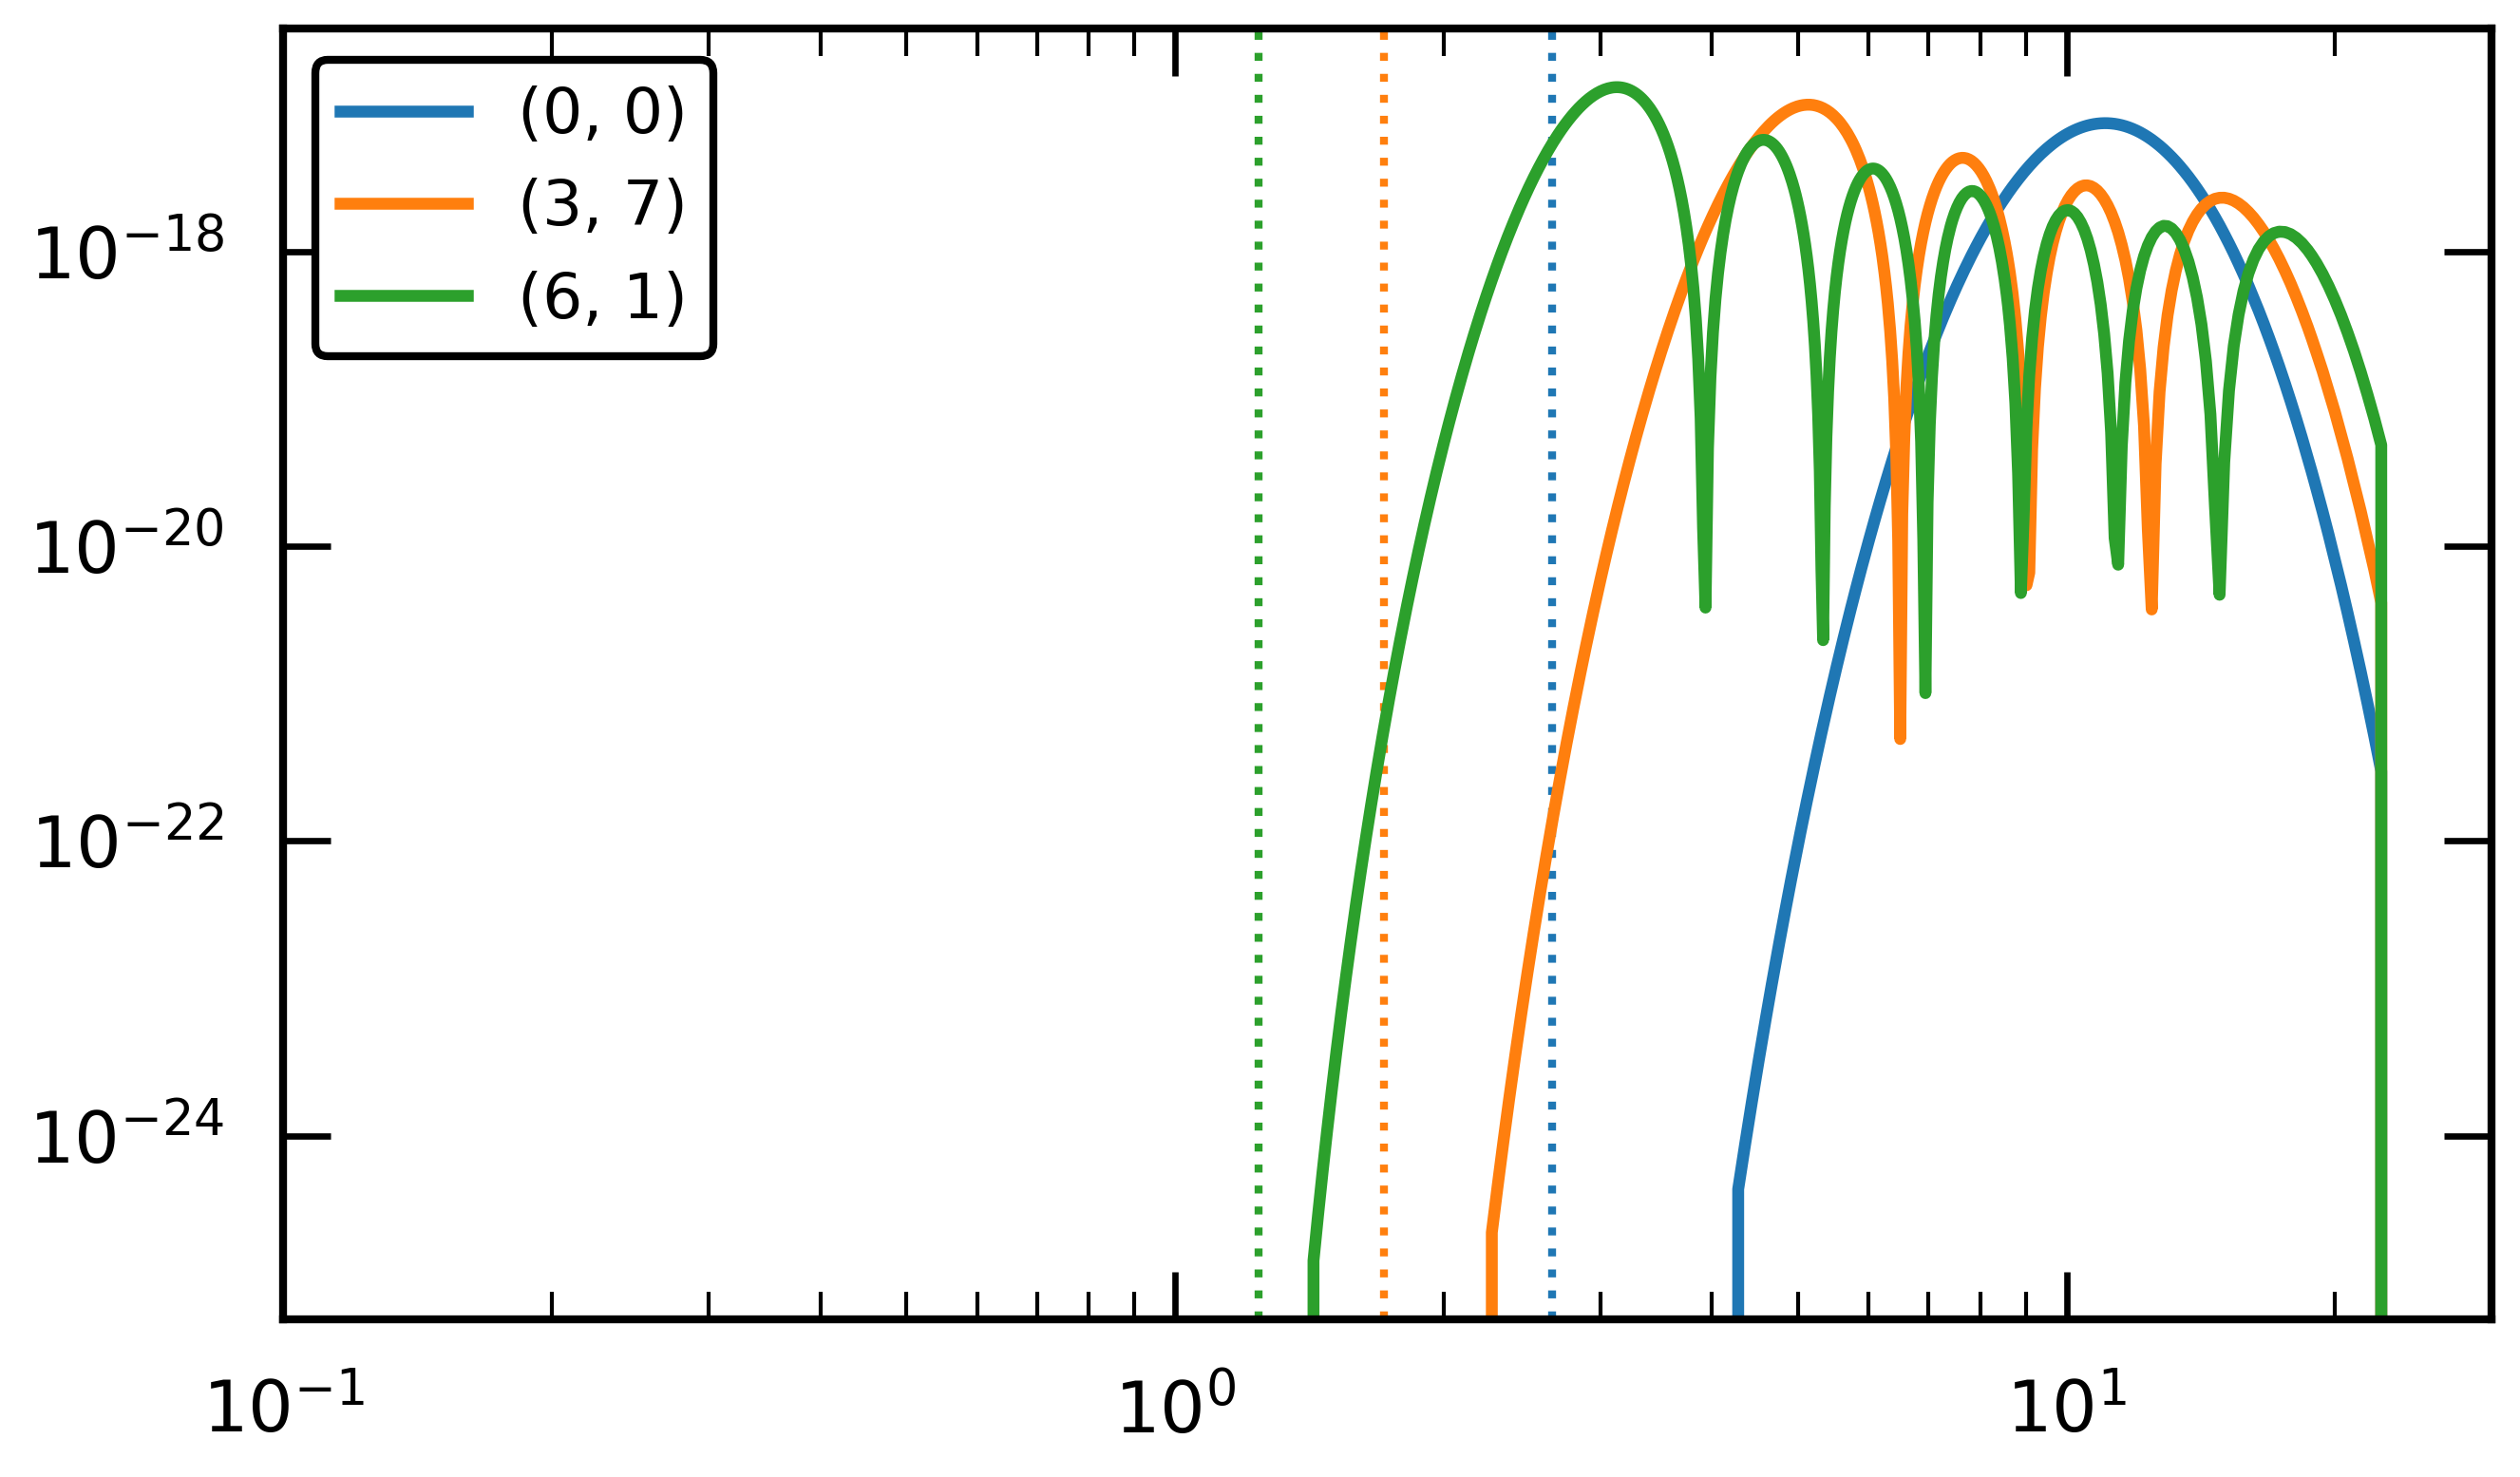

In [30]:
fig, ax = plt.subplots()
index = 0
ax.plot(energy_SEDs, cross_section_babb['sigma'][index][::-1],
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C0')
ax.axvline(x=energy_levels_babb['eV'][index].value, ls=':', lw=2, c='C0')
index = 60
ax.plot(energy_SEDs, cross_section_babb['sigma'][index][::-1],
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C1')
ax.axvline(x=energy_levels_babb['eV'][index].value, ls=':', lw=2, c='C1')
index = 120
ax.plot(energy_SEDs, cross_section_babb['sigma'][index][::-1],
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C2')
ax.axvline(x=energy_levels_babb['eV'][index].value, ls=':', lw=2, c='C2')
ax.set_xscale('log')
ax.set_yscale('log')
legend = ax.legend(ncol=1, loc='best')
legend.get_frame().set_linewidth(2)
ax.set_xlim(left=0.1, right=30)

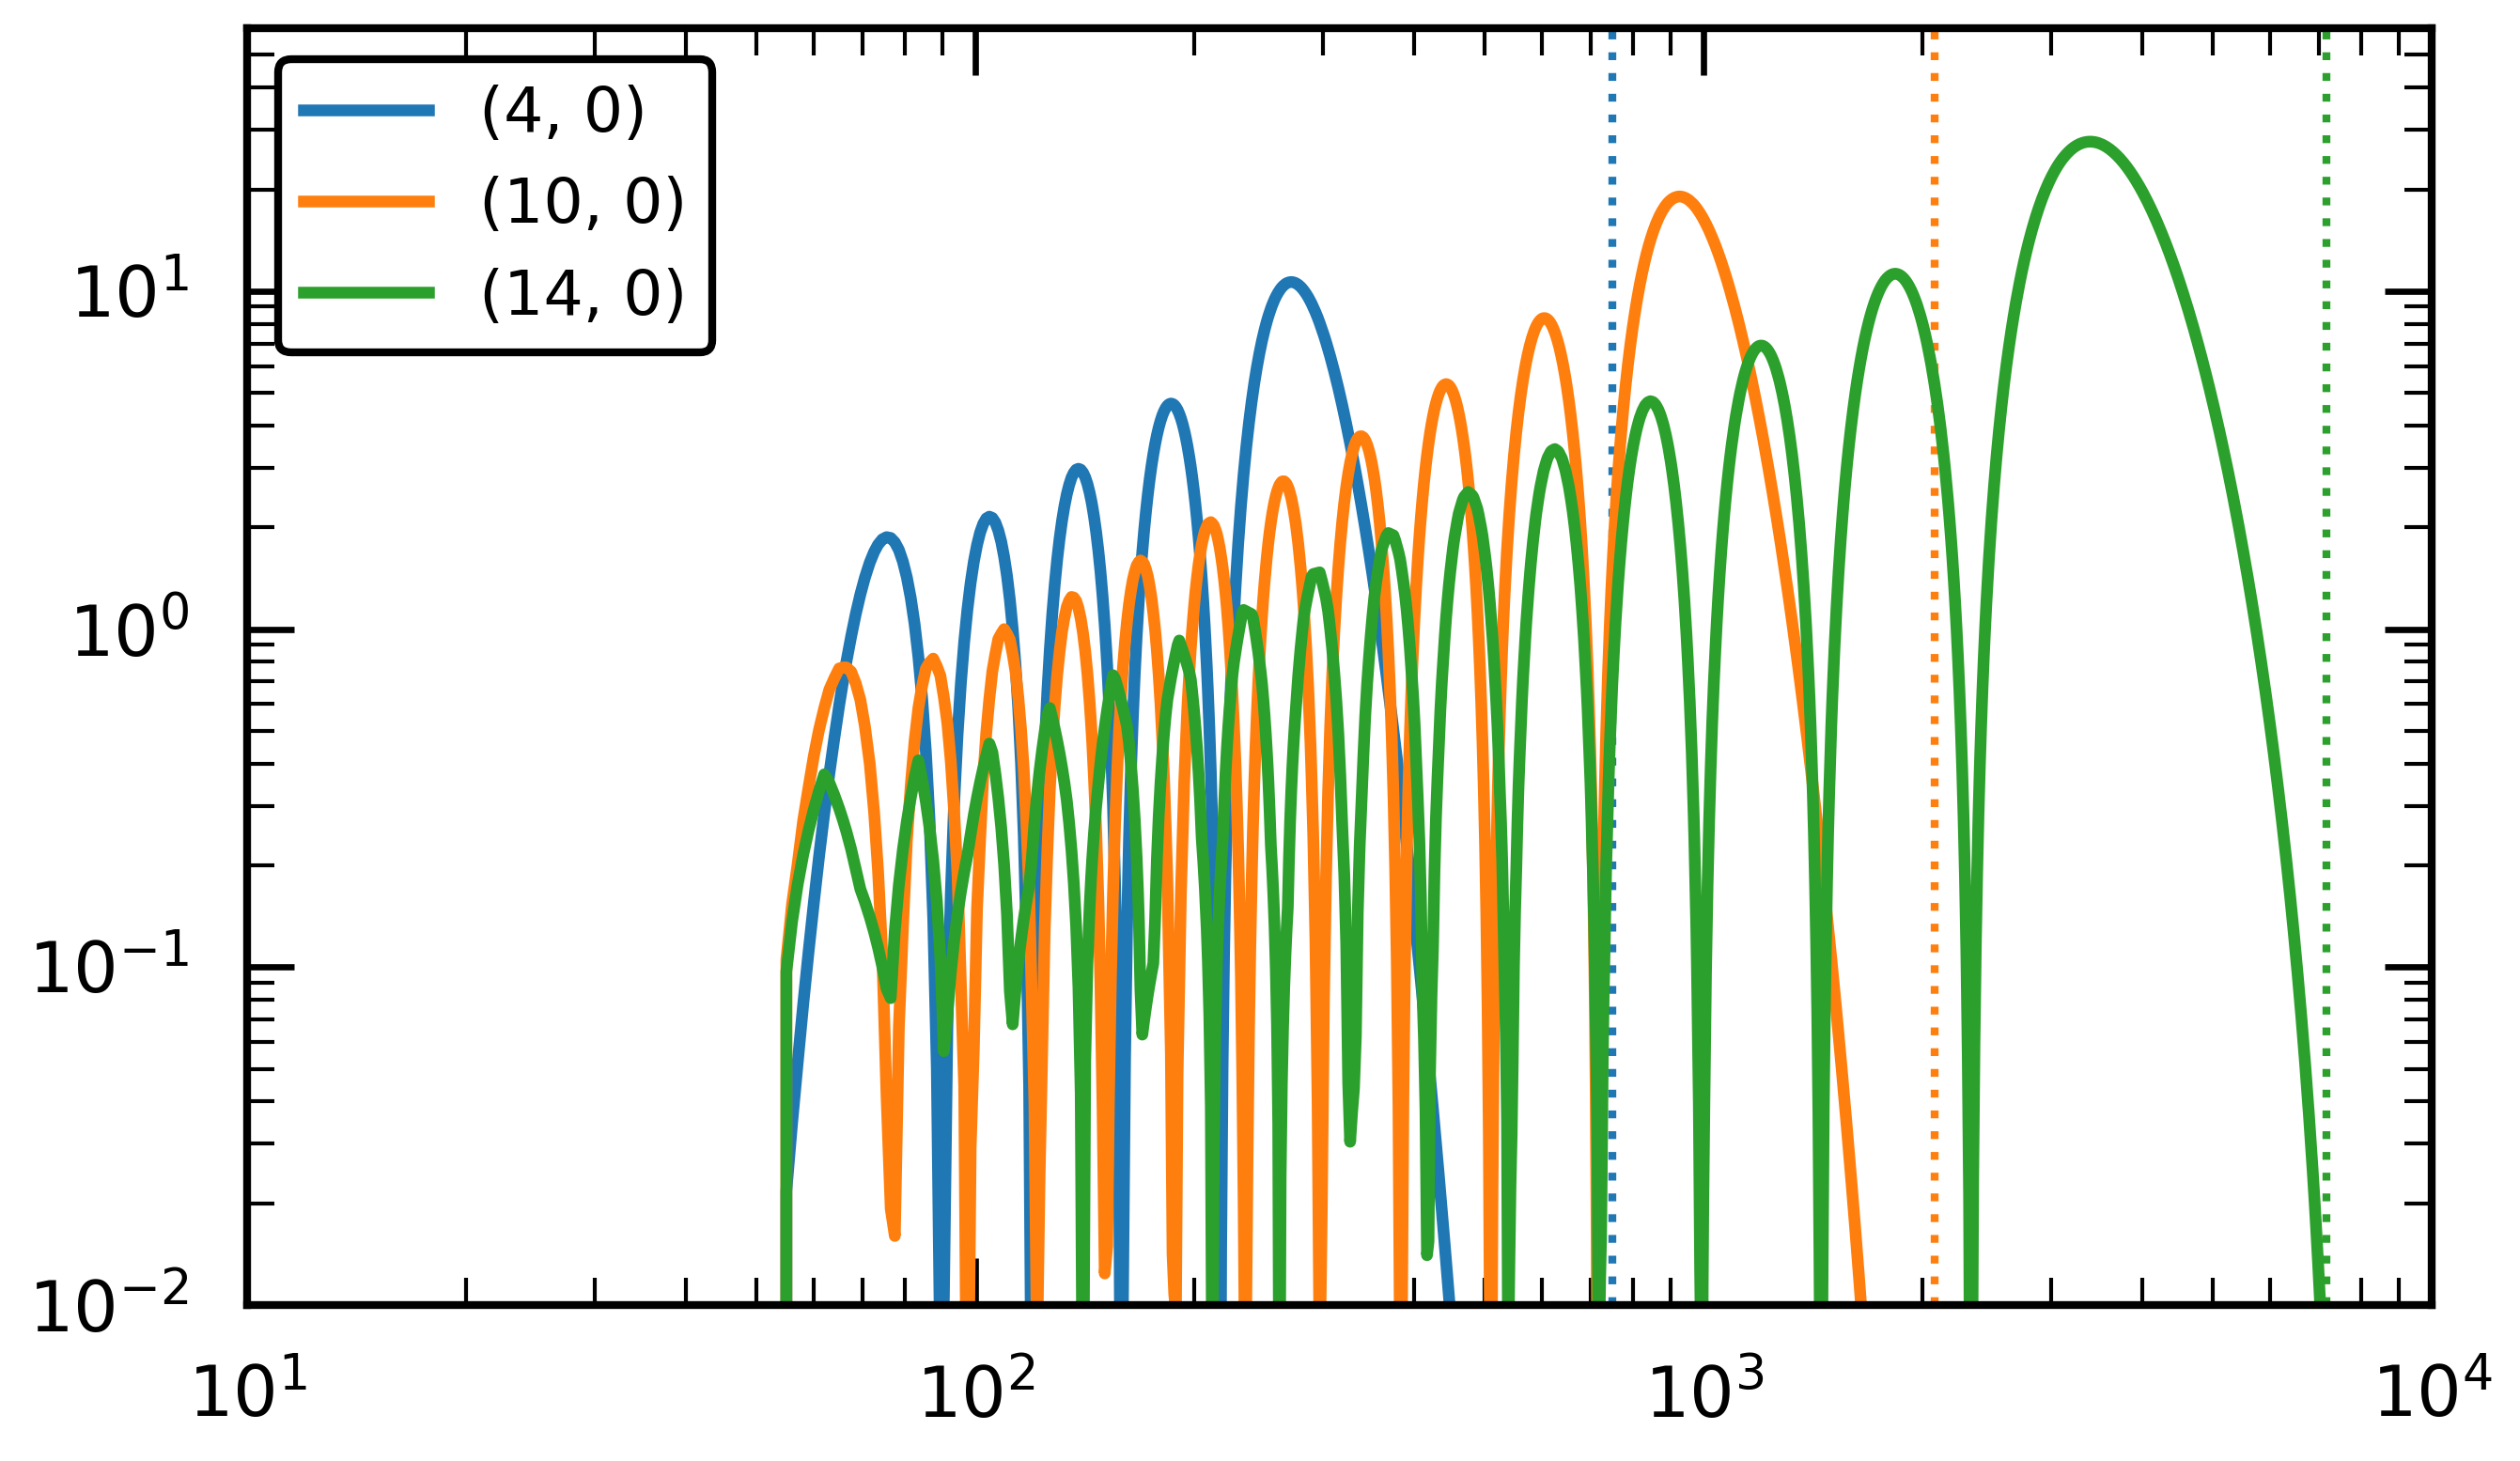

In [63]:
fig, ax = plt.subplots()
index = 74
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C0')
ax.axvline(x=((1. / energy_levels_babb['cm'][index]).to(u.nm)).value, ls=':', lw=2, c='C0')
index = 213
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C1')
ax.axvline(x=((1. / energy_levels_babb['cm'][index]).to(u.nm)).value, ls=':', lw=2, c='C1')
index = 288
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C2')
ax.axvline(x=((1. / energy_levels_babb['cm'][index]).to(u.nm)).value, ls=':', lw=2, c='C2')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1e1, right=1e4)
ax.set_ylim(bottom=1e-2, top=6e1)
legend = ax.legend(ncol=1, loc='best')
legend.get_frame().set_linewidth(2)

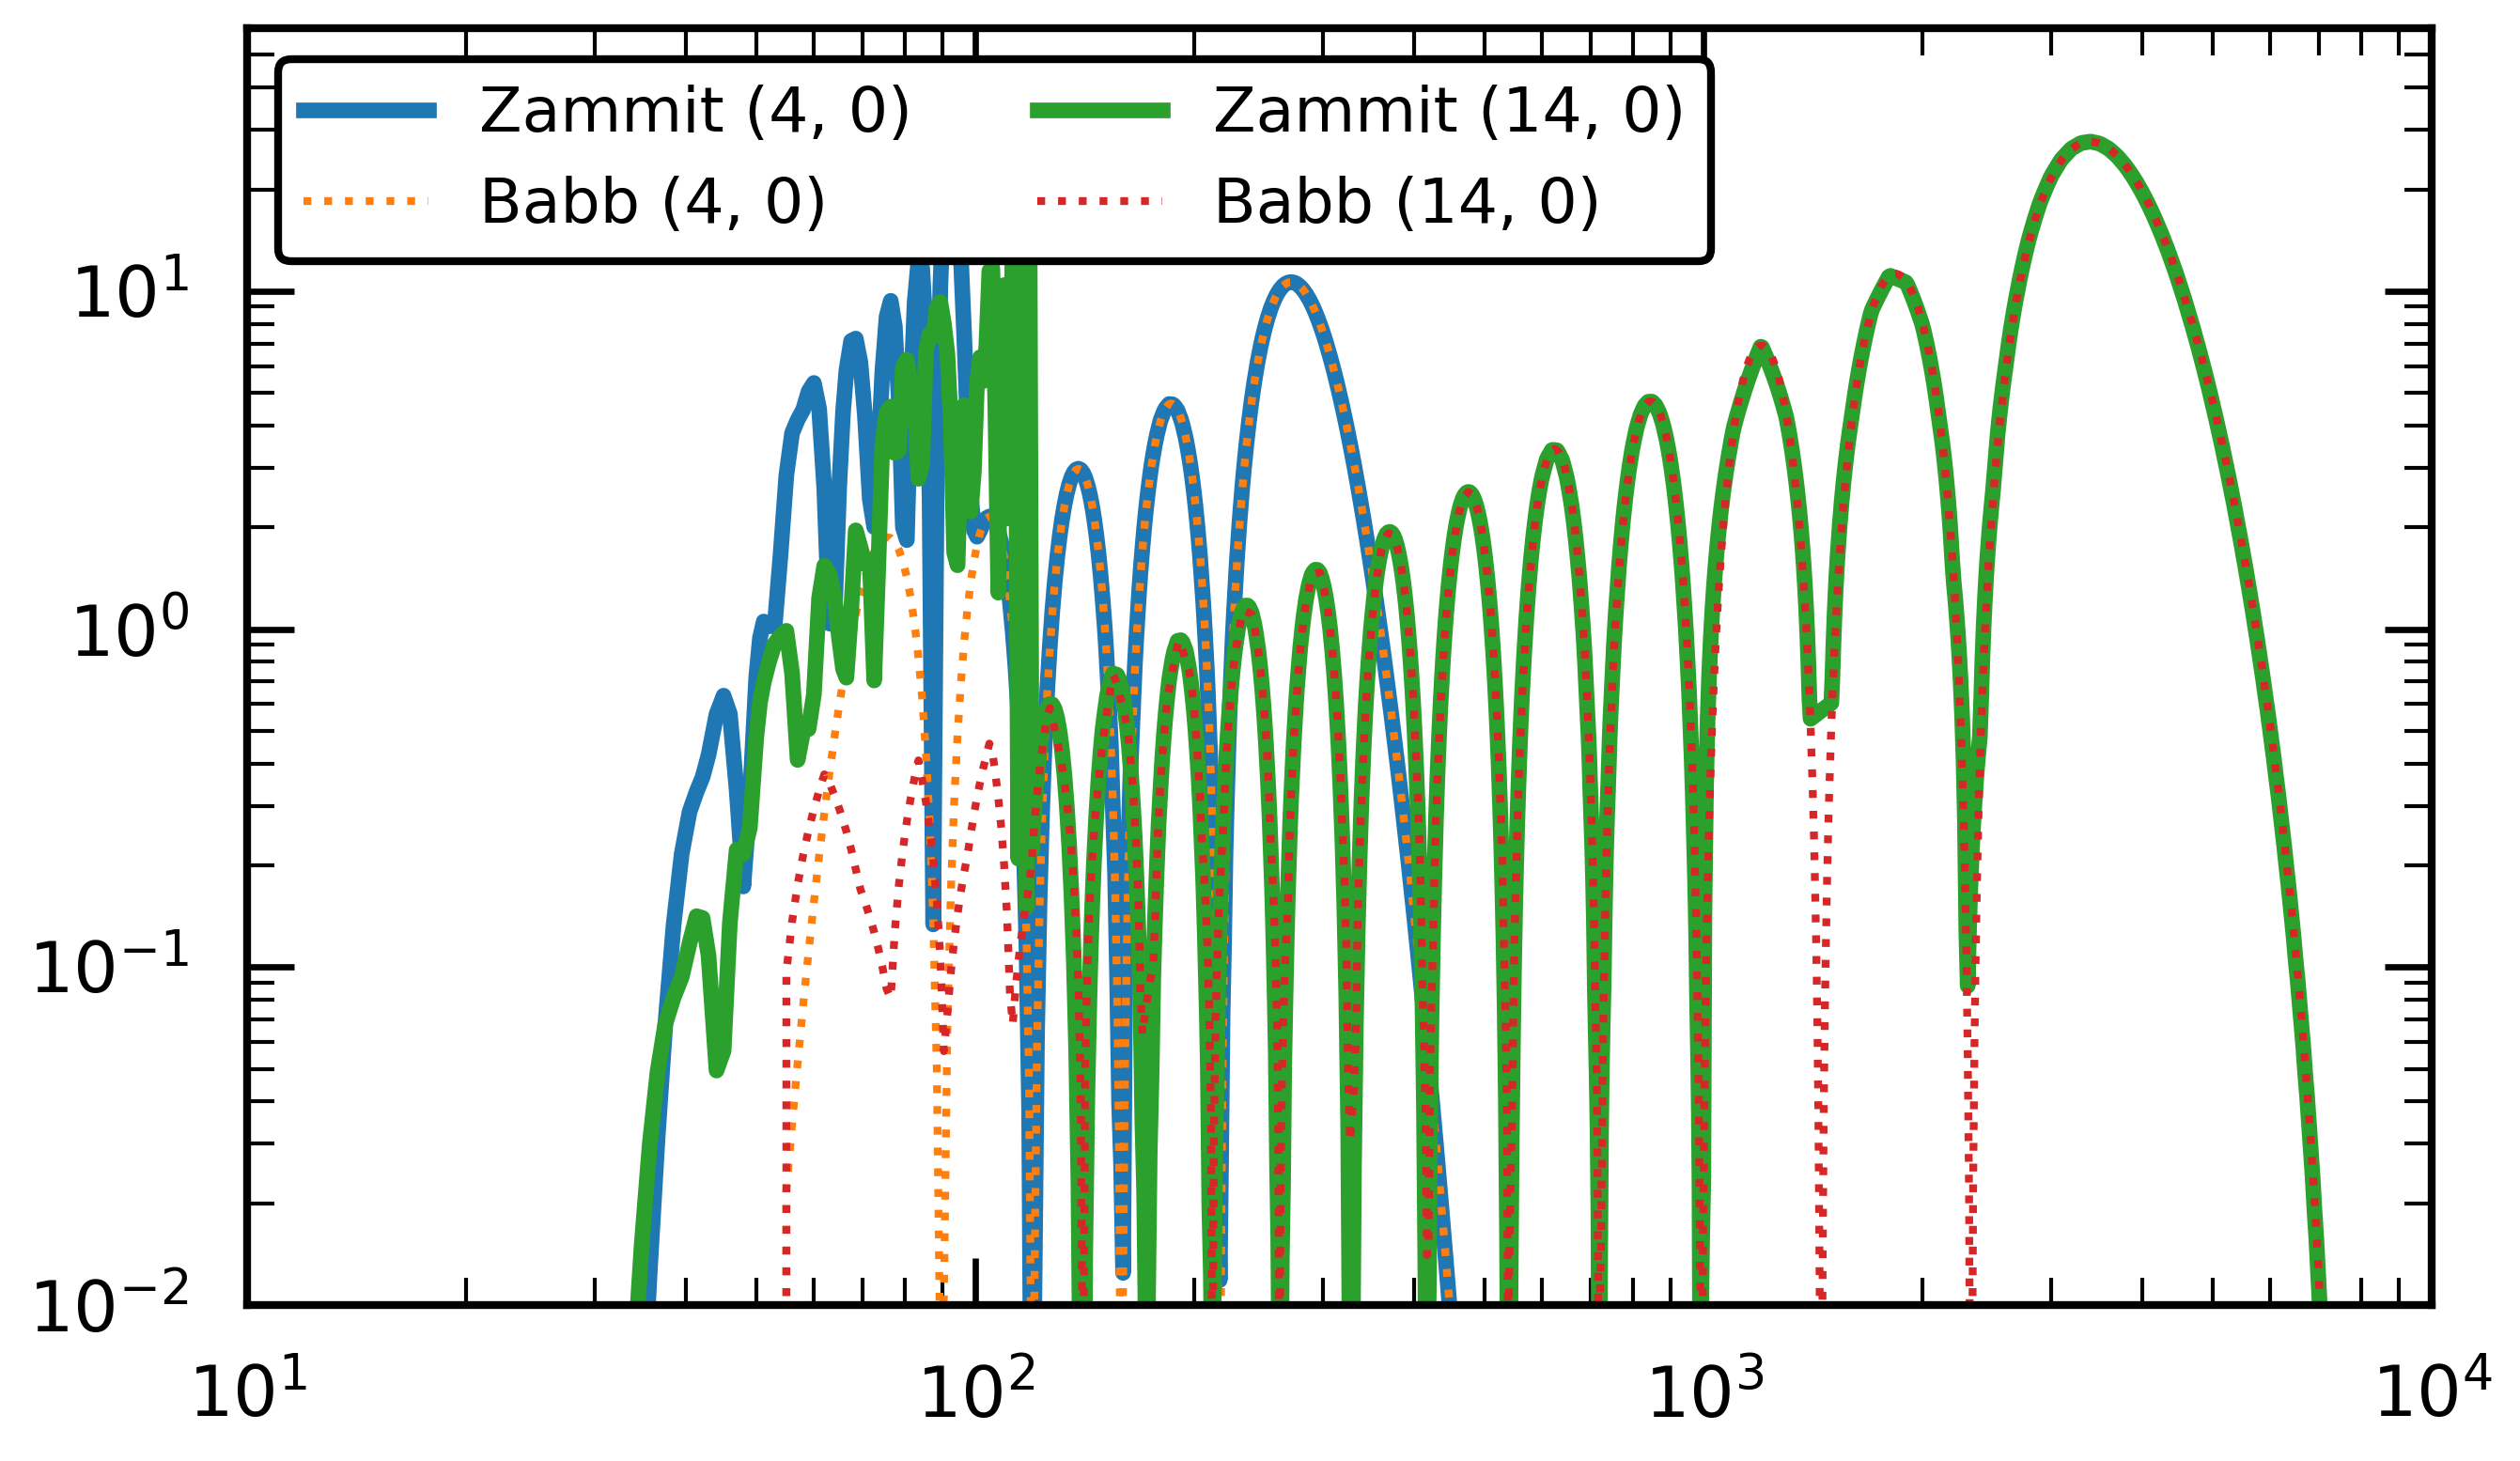

In [79]:
fig, ax = plt.subplots()
index = 137
ax.plot(wl_SEDs.to(u.nm), cross_section_zammit['sigma'][index]*1e18,
        label='Zammit ({0}, {1})'.format(energy_levels_zammit['v'][index], energy_levels_zammit['J'][index]),
        ls='-', lw=4, c='C0')
index = 74
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='Babb ({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls=':', lw=2, c='C1')
index = 374
ax.plot(wl_SEDs.to(u.nm), cross_section_zammit['sigma'][index]*1e18,
        label='Zammit ({0}, {1})'.format(energy_levels_zammit['v'][index], energy_levels_zammit['J'][index]),
        ls='-', lw=4, c='C2')
index = 288
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='Babb ({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls=':', lw=2, c='C3')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1e1, right=1e4)
ax.set_ylim(bottom=1e-2, top=6e1)
legend = ax.legend(ncol=2, loc='best')
legend.get_frame().set_linewidth(2)

In [48]:
(1. / energy_levels_babb['cm'][0]).to(u.nm)

<Quantity 467.81546551 nm>

In [32]:
energy_levels_babb['eV'][0]

<Quantity 2.65028003 eV>

In [34]:
min_wl = (55 * u.nm).to(u.Angstrom)
lambda2nu(min_wl)[0] * (const.h).to(u.eV / u.Hz)

<Quantity 22.54258153 eV>

In [43]:
energy_atomic_units = 2. * (const.Ryd) * (const.c).to(u.m * u.Hz) * (const.h).to(u.eV / u.Hz)

In [45]:
energy_atomic_units * 0.731 + energy_levels_babb['eV'][0]

<Quantity 22.54180337 eV>

## H2p partition function

In [18]:
def calculate_total_partition_function(gas_temperature):    
    single_states = (2. - (-1.)**energy_levels_zammit['J']) / 2. * (2. * energy_levels_zammit['J'] + 1.) * np.exp(-energy_levels_zammit['K'] / gas_temperature)
    total_partition_function = single_states.sum()
    return total_partition_function

In [13]:
gas_temperature_array = [1000., 2000., 3150., 5040., 8400., 12600., 16800., 25200.] * u.K
Zammit_values = np.array([26.1, 66.2, 142.1, 361.2, 1024.0, 2043.1, 3009.2, 4546.3])

In [20]:
my_values = [calculate_total_partition_function(gas_temperature) for gas_temperature in gas_temperature_array]

In [21]:
my_values

[<Quantity 26.14594648>,
 <Quantity 66.21186703>,
 <Quantity 142.16070508>,
 <Quantity 361.3548744>,
 <Quantity 1024.31732341>,
 <Quantity 2043.53326095>,
 <Quantity 3009.66024129>,
 <Quantity 4546.76532615>]

## read datasets

In [2]:
from LWphotorates.H2p import read_Babb, read_Zammit, get_cross_section_babb, get_cross_section_zammit
from LWphotorates.utils import lambda2nu

In [3]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [4]:
old_babb_data = read_Babb(wl_SEDs)
old_zammit_data = read_Zammit(wl_SEDs)

In [5]:
new_babb_data = get_cross_section_babb(wl_SEDs)
new_zammit_data = get_cross_section_zammit()

In [36]:
for key in new_zammit_data.keys():
    print('{0}: {1} {2}'.format(key, new_zammit_data[key].shape, type(new_zammit_data[key])))

print('\n\n')

for key in new_babb_data.keys():
    print('{0}: {1} {2}'.format(key, new_babb_data[key].shape, type(new_babb_data[key])))

v: (423,) <class 'numpy.ndarray'>
J: (423,) <class 'numpy.ndarray'>
eV: (423,) <class 'astropy.units.quantity.Quantity'>
cm: (423,) <class 'astropy.units.quantity.Quantity'>
K: (423,) <class 'astropy.units.quantity.Quantity'>
photon_wl: (650,) <class 'astropy.units.quantity.Quantity'>
photon_energy: (650,) <class 'astropy.units.quantity.Quantity'>
cross_section: (423, 650) <class 'astropy.units.quantity.Quantity'>
heating_cross_section: (423, 650) <class 'astropy.units.quantity.Quantity'>



v: (337,) <class 'numpy.ndarray'>
J: (337,) <class 'numpy.ndarray'>
eV: (337,) <class 'astropy.units.quantity.Quantity'>
cm: (337,) <class 'astropy.units.quantity.Quantity'>
K: (337,) <class 'astropy.units.quantity.Quantity'>
photon_wl: (1221,) <class 'astropy.units.quantity.Quantity'>
photon_energy: (1221,) <class 'astropy.units.quantity.Quantity'>
cross_section: (337, 1221) <class 'astropy.units.quantity.Quantity'>
heating_cross_section: (337, 1221) <class 'astropy.units.quantity.Quantity'>


In [6]:
print(new_babb_data.keys())
print(old_babb_data[0].keys())
print(old_babb_data[1].keys())

dict_keys(['v', 'J', 'eV', 'cm', 'K', 'photon_wl', 'photon_energy', 'cross_section', 'heating_cross_section'])
dict_keys(['v', 'J', 'cm', 'eV', 'K'])
dict_keys(['sigma', 'heat_sigma'])


In [7]:
print(abs(new_babb_data['v'] - old_babb_data[0]['v']).max())
print(abs(new_babb_data['J'] - old_babb_data[0]['J']).max())

0
0


In [8]:
print(abs(new_babb_data['cross_section'] - old_babb_data[1]['sigma']).max())
print(abs(new_babb_data['heating_cross_section'] - old_babb_data[1]['heat_sigma']).max())

0.0 cm2
0.0 cm2 eV


In [9]:
print(new_zammit_data.keys())
print(old_zammit_data[0].keys())
print(old_zammit_data[1].keys())

dict_keys(['v', 'J', 'eV', 'cm', 'K', 'photon_wl', 'photon_energy', 'cross_section', 'heating_cross_section'])
dict_keys(['v', 'J', 'eV', 'cm', 'K'])
dict_keys(['sigma', 'heat_sigma'])


In [10]:
print(abs(new_zammit_data['v'] - old_zammit_data[0]['v']).max())
print(abs(new_zammit_data['J'] - old_zammit_data[0]['J']).max())

0
0


(100.0, 10000.0)

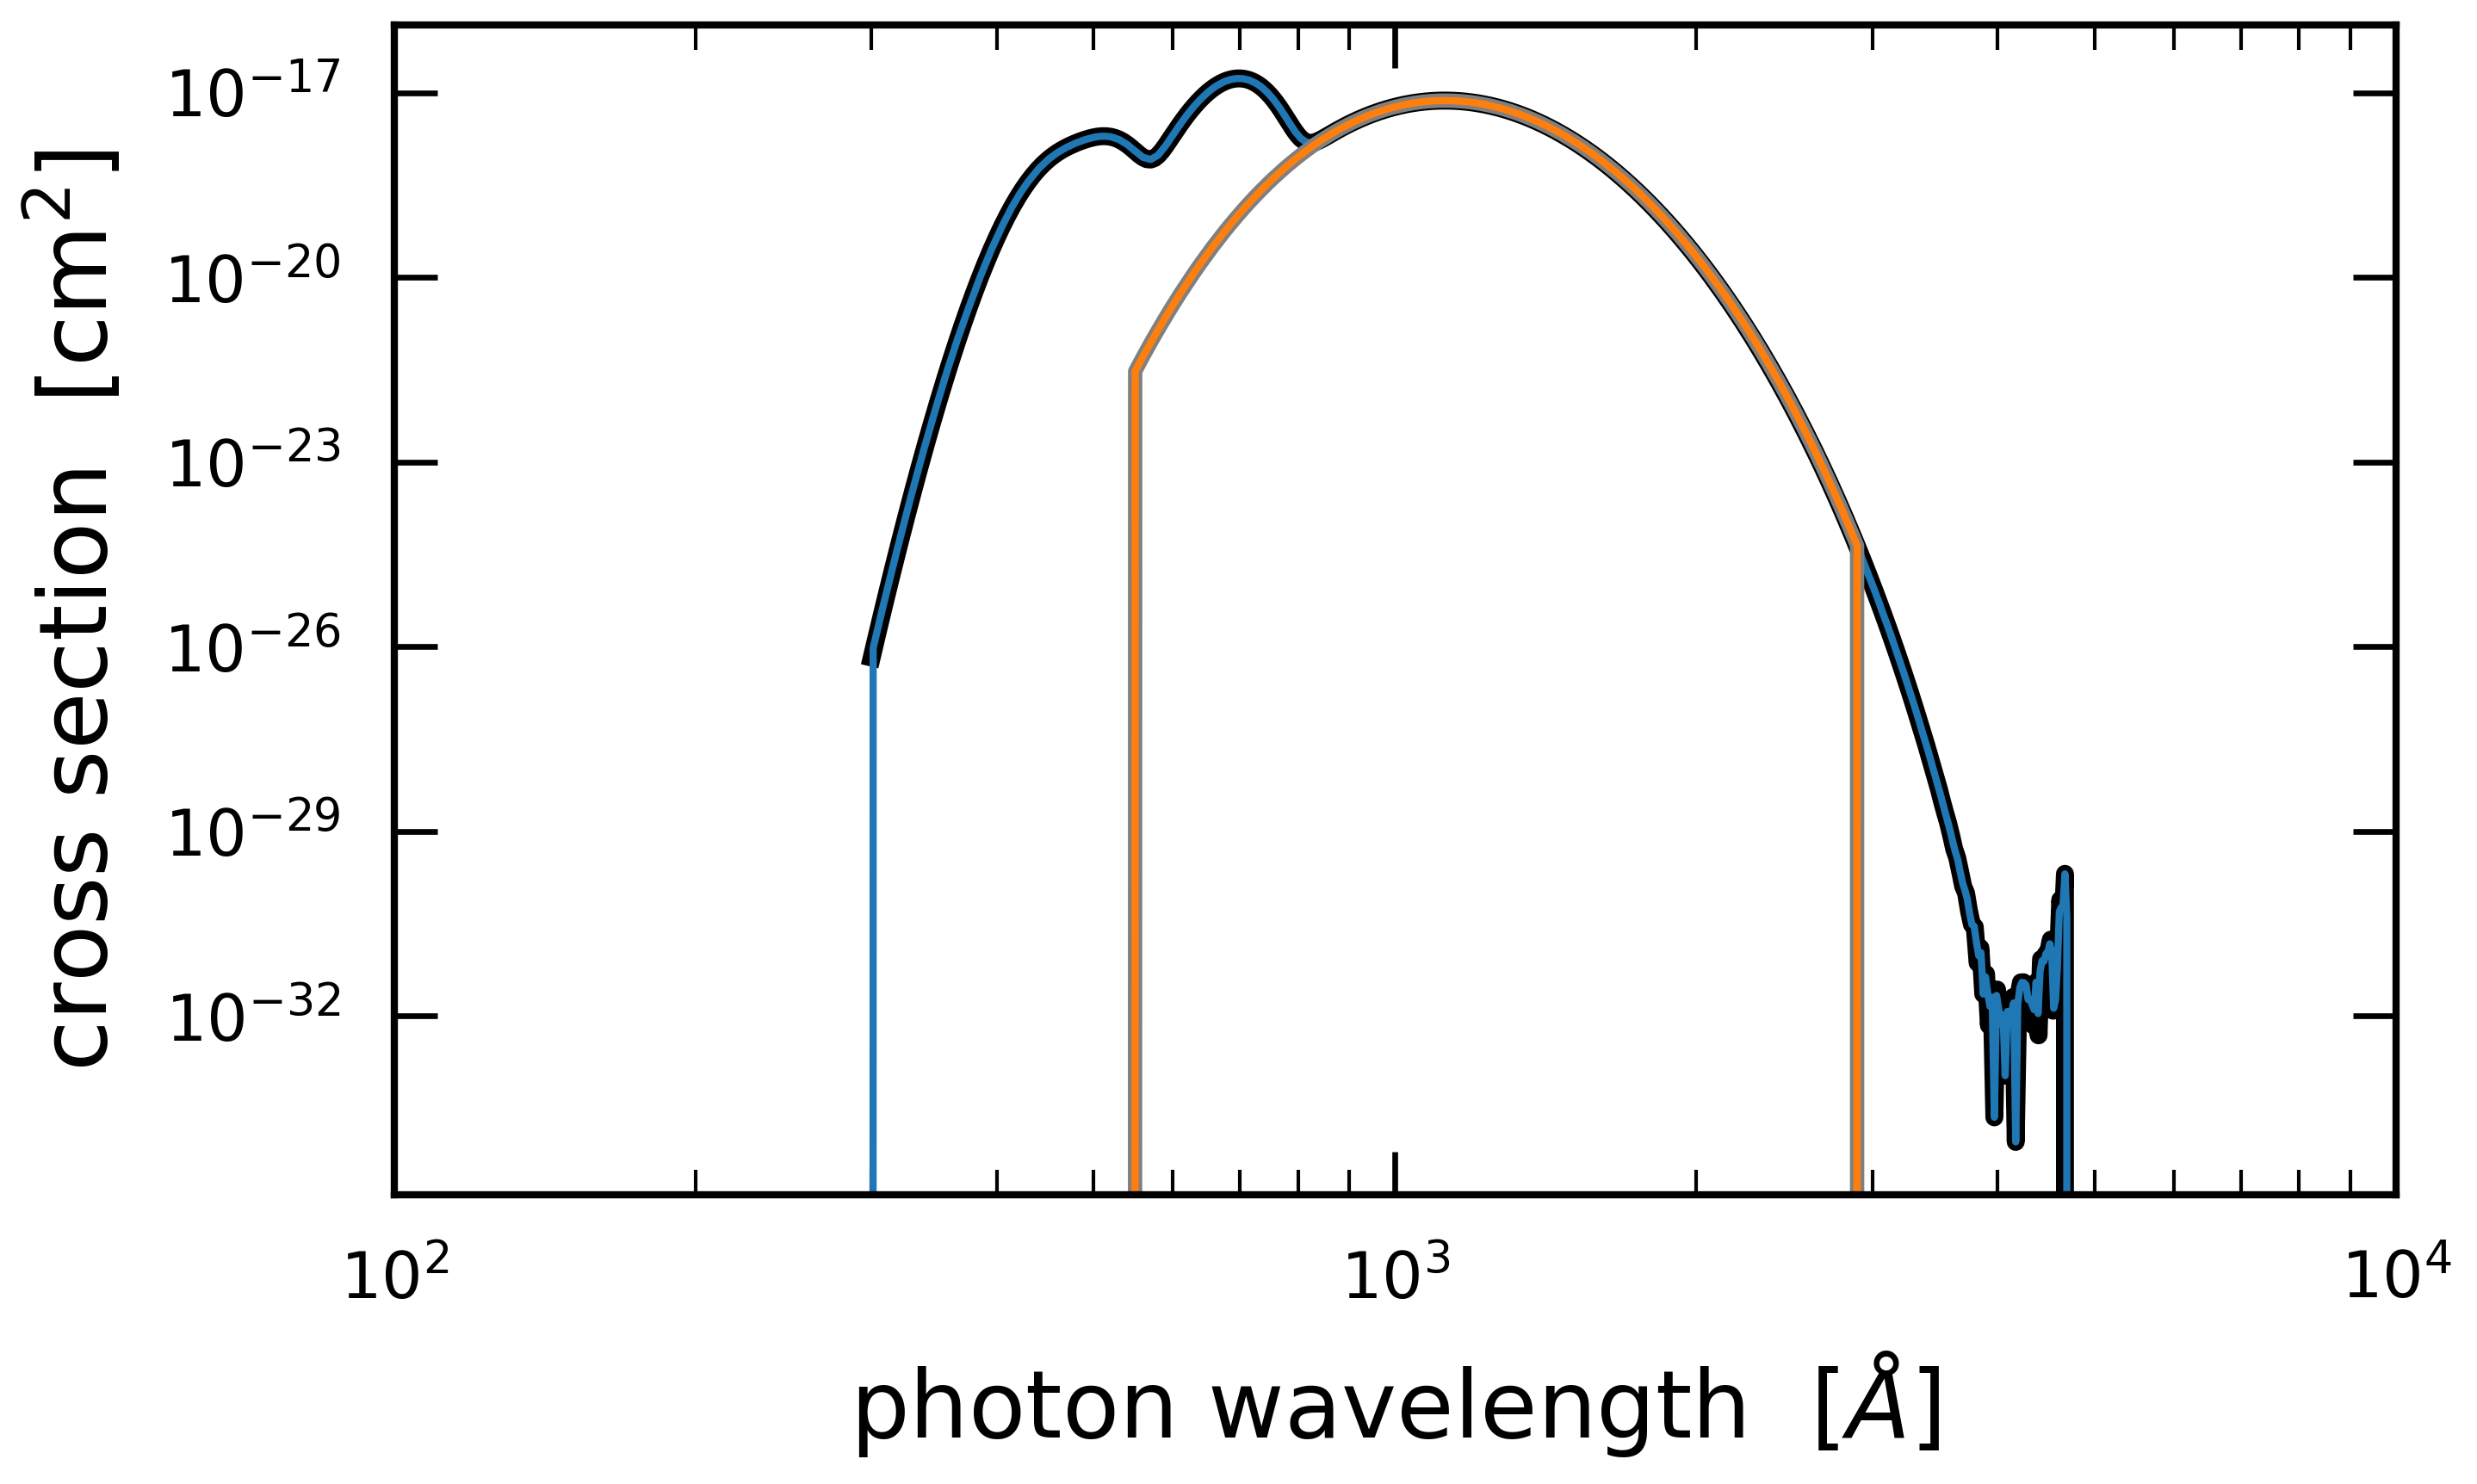

In [25]:
fig, ax = plt.subplots()
ax.plot(new_zammit_data['photon_wl'], new_zammit_data['cross_section'][0], c='k', lw=5, ls='-')
ax.plot(wl_SEDs, old_zammit_data[1]['sigma'][0], c='C0', lw=2, ls='-')
ax.plot(new_babb_data['photon_wl'], new_babb_data['cross_section'][0], c='grey', lw=4, ls='-')
ax.plot(wl_SEDs, old_babb_data[1]['sigma'][0], c='C1', lw=2, ls='-')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'photon wavelength  [$\AA$]')
ax.set_ylabel(r'cross section  [cm$^2$]')
ax.set_xlim(left=1e2, right=1e4)

(1.0, 100.0)

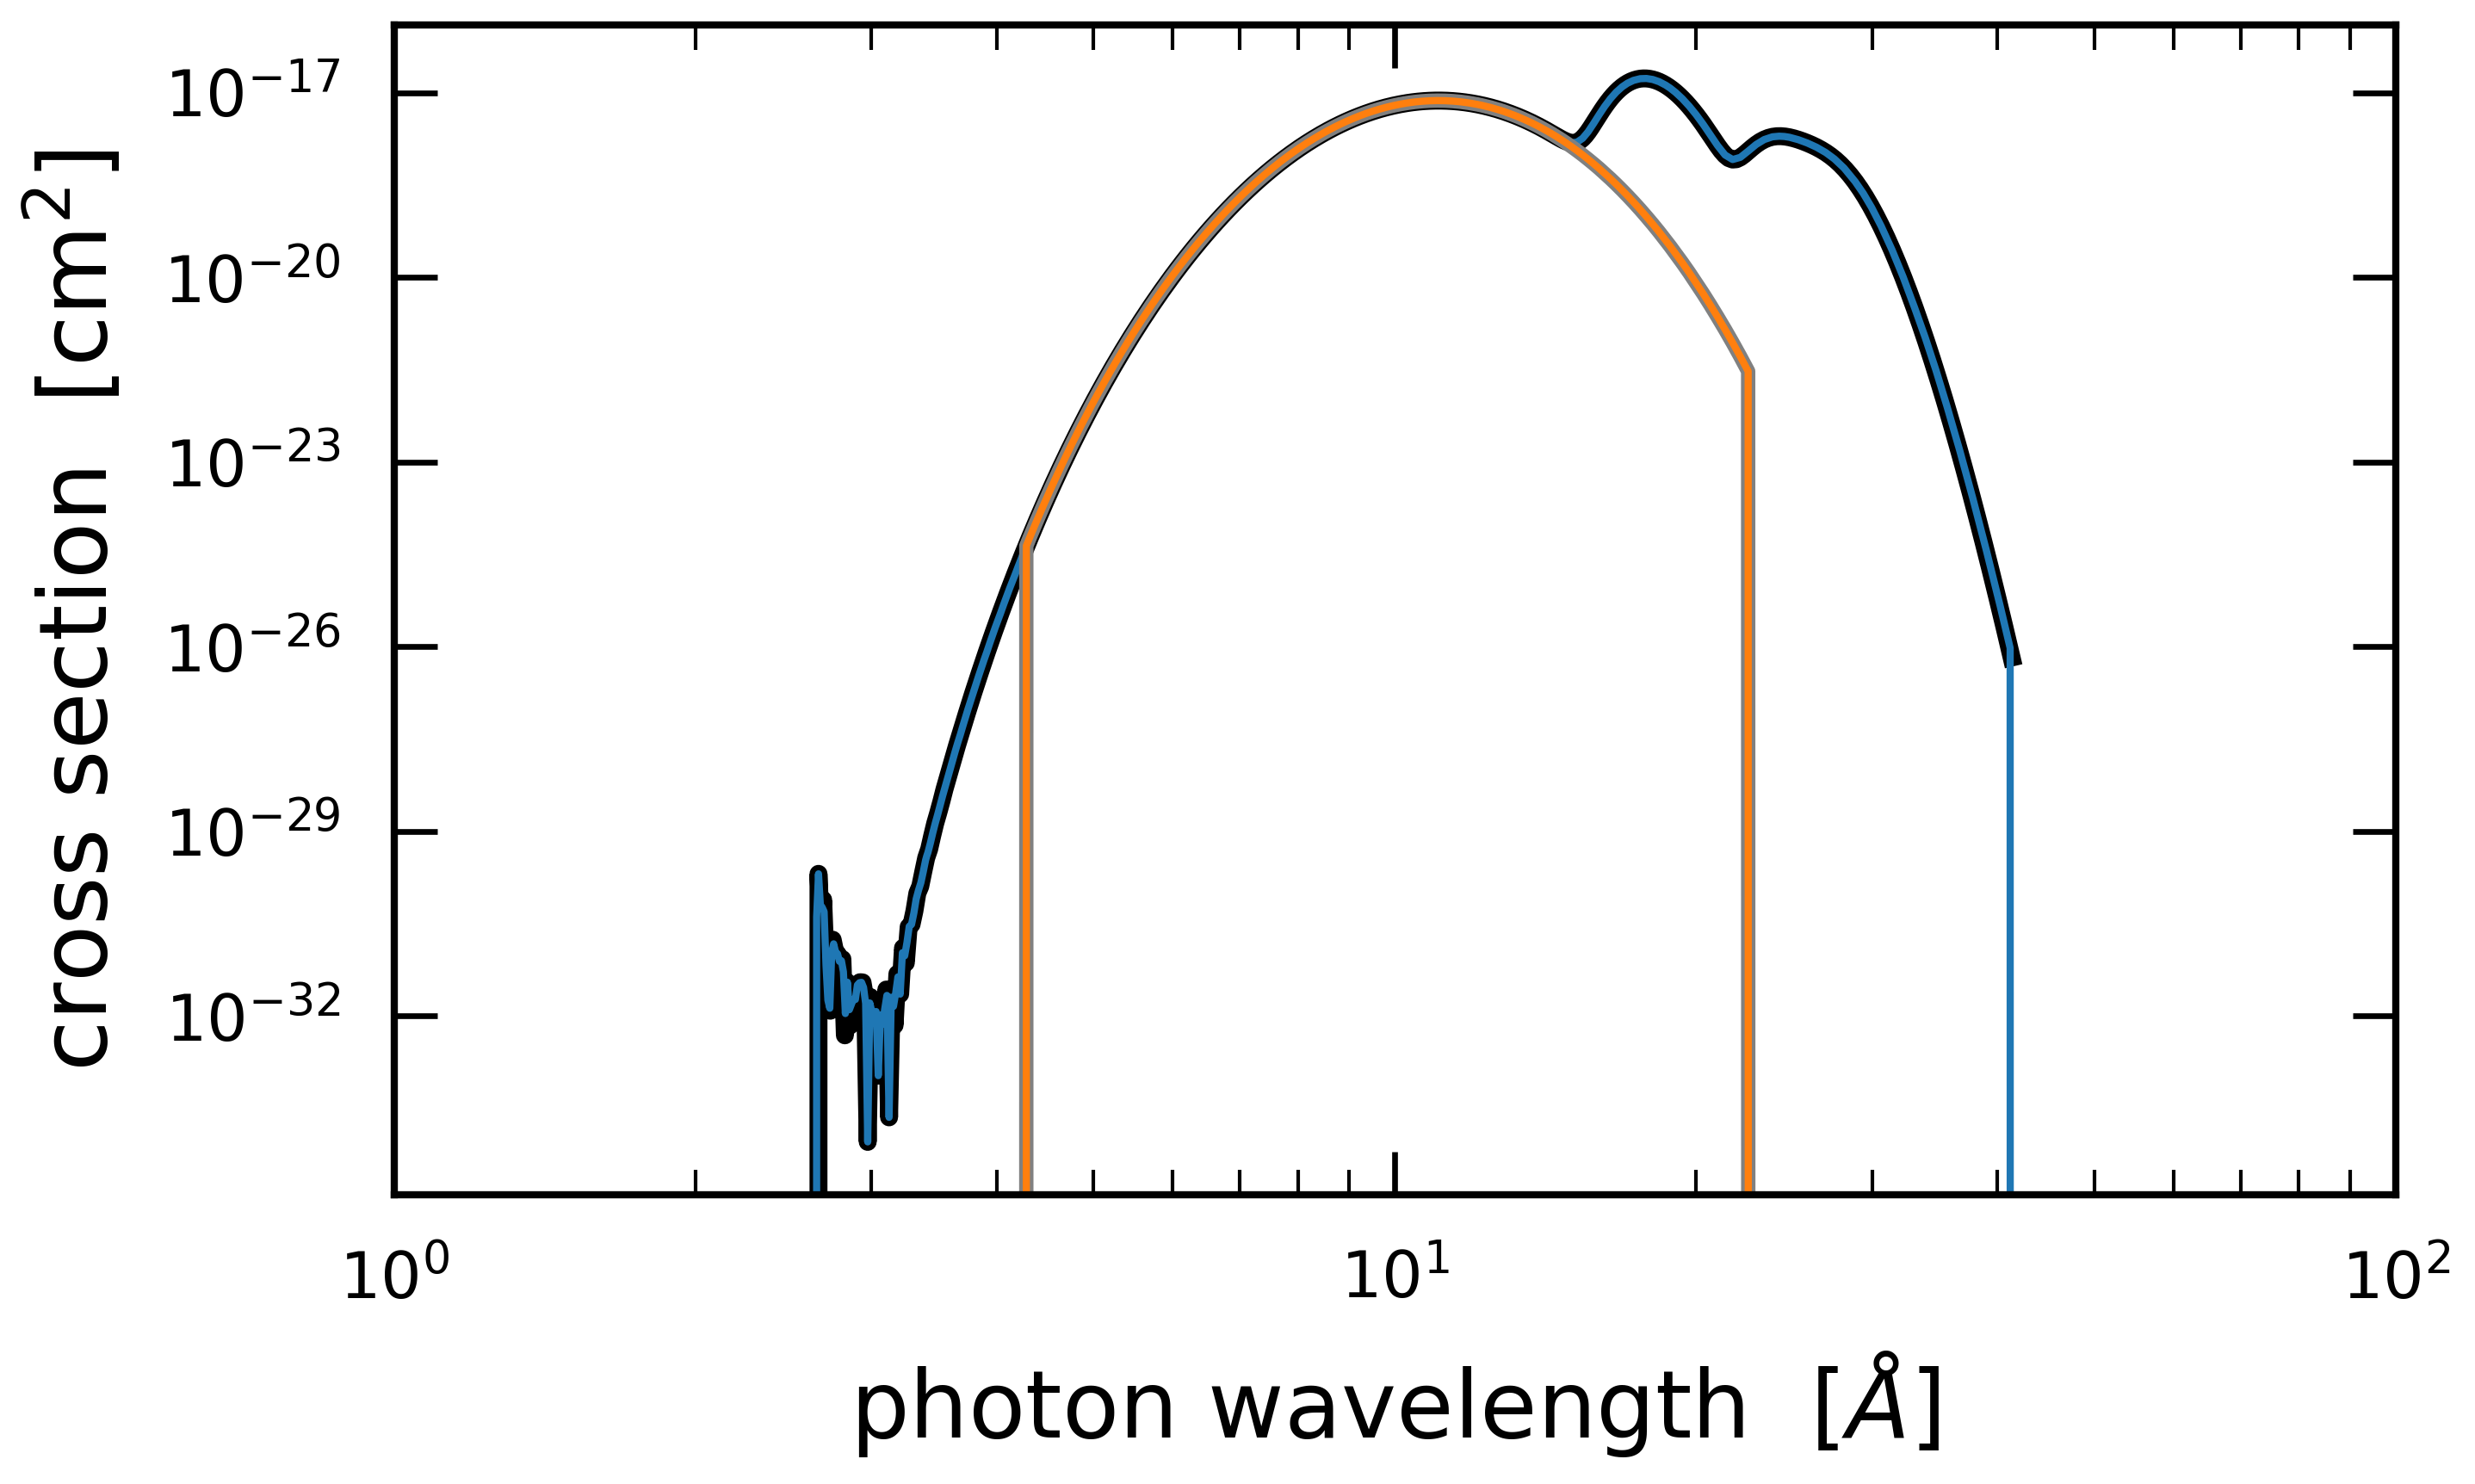

In [31]:
fig, ax = plt.subplots()
ax.plot(new_zammit_data['photon_energy'], new_zammit_data['cross_section'][0], c='k', lw=5, ls='-')
ax.plot(energy_SEDs[::-1], old_zammit_data[1]['sigma'][0], c='C0', lw=2, ls='-')
ax.plot(new_babb_data['photon_energy'], new_babb_data['cross_section'][0], c='grey', lw=4, ls='-')
ax.plot(energy_SEDs[::-1], old_babb_data[1]['sigma'][0], c='C1', lw=2, ls='-')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'photon wavelength  [$\AA$]')
ax.set_ylabel(r'cross section  [cm$^2$]')
ax.set_xlim(left=1e0, right=1e2)